In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadridwanw","key":"63142fd895367b4e3a364a948f894007"}'}

In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [14]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 35.1MB/s]


In [15]:
!unzip stroke-prediction-dataset.zip -d stroke
!ls stroke

Archive:  stroke-prediction-dataset.zip
  inflating: stroke/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("stroke/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
data.dropna(axis=0,inplace=True)

In [19]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
data.age[data.age<=20] = 0
data.age[(data.age<=40) & (data.age>20)] = 1
data.age[(data.age<=60) & (data.age>40)] = 2
data.age[data.age>60] = 3

<ipython-input-20-770d9d8bb4f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age<=20] = 0
<ipython-input-20-770d9d8bb4f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age<=40) & (data.age>20)] = 1
<ipython-input-20-770d9d8bb4f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[(data.age<=60) & (data.age>40)] = 2
<ipython-input-20-770d9d8bb4f9>:4: SettingWithCopyWarning: 
A value is trying t

In [21]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,3.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,2.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,3.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,3.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [23]:
data.smoking_status=[0 if item == "Unknown" else 1 if item=="never smoked" else 2 if item == "formerly smoked" else 3 for item in data.smoking_status]

In [22]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,3.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,2.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,3.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,3.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [24]:
data.Residence_type=[0 if item == "Urban" else 1 for item in data.Residence_type]

In [25]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,Private,0,228.69,36.6,2,1
2,31112,Male,3.0,0,1,Yes,Private,1,105.92,32.5,1,1
3,60182,Female,2.0,0,0,Yes,Private,0,171.23,34.4,3,1
4,1665,Female,3.0,1,0,Yes,Self-employed,1,174.12,24.0,1,1
5,56669,Male,3.0,0,0,Yes,Private,0,186.21,29.0,2,1


In [26]:
data.work_type=[0 if item == "Never_worked" else 1 if item=="children" else 2 if item == "Govt_job" else 3 if item == "Private" else 4 for item in data.work_type]

In [27]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,3.0,0,1,Yes,3,0,228.69,36.6,2,1
2,31112,Male,3.0,0,1,Yes,3,1,105.92,32.5,1,1
3,60182,Female,2.0,0,0,Yes,3,0,171.23,34.4,3,1
4,1665,Female,3.0,1,0,Yes,4,1,174.12,24.0,1,1
5,56669,Male,3.0,0,0,Yes,3,0,186.21,29.0,2,1


In [28]:
data.gender=[0 if item == "Male" else 1 for item in data.gender]

In [29]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,Yes,3,0,228.69,36.6,2,1
2,31112,0,3.0,0,1,Yes,3,1,105.92,32.5,1,1
3,60182,1,2.0,0,0,Yes,3,0,171.23,34.4,3,1
4,1665,1,3.0,1,0,Yes,4,1,174.12,24.0,1,1
5,56669,0,3.0,0,0,Yes,3,0,186.21,29.0,2,1


In [30]:
data.ever_married=[0 if item == "Yes" else 1 for item in data.ever_married]

In [31]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,0,3,0,228.69,36.6,2,1
2,31112,0,3.0,0,1,0,3,1,105.92,32.5,1,1
3,60182,1,2.0,0,0,0,3,0,171.23,34.4,3,1
4,1665,1,3.0,1,0,0,4,1,174.12,24.0,1,1
5,56669,0,3.0,0,0,0,3,0,186.21,29.0,2,1


In [32]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,0.590344,1.599307,0.091872,0.049501,0.347321,2.742717,0.492768,105.305150,28.893237,1.168670,0.042575
std,20995.098457,0.491820,1.069397,0.288875,0.216934,0.476167,0.898479,0.499999,44.424341,7.854067,1.022201,0.201917
min,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,18605.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,37608.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,91.680000,28.100000,1.000000,0.000000
75%,55220.000000,1.000000,2.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,72940.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [33]:
data.bmi=[0 if item <=23.5 else 1 if item>23.5 and item<=28.1 else 2 if item >28.1 and item<=33.1 else 3 for item in data.bmi]

In [34]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,0,3,0,228.69,3,2,1
2,31112,0,3.0,0,1,0,3,1,105.92,2,1,1
3,60182,1,2.0,0,0,0,3,0,171.23,3,3,1
4,1665,1,3.0,1,0,0,4,1,174.12,1,1,1
5,56669,0,3.0,0,0,0,3,0,186.21,2,2,1


In [35]:
data.avg_glucose_level=[0 if item <=77.07 else 1 if item>77.07 and item<=91.68 else 2 if item >91.68 and item<=113.57 else 3 for item in data.avg_glucose_level]

In [36]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,3.0,0,1,0,3,0,3,3,2,1
2,31112,0,3.0,0,1,0,3,1,2,2,1,1
3,60182,1,2.0,0,0,0,3,0,3,3,3,1
4,1665,1,3.0,1,0,0,4,1,3,1,1,1
5,56669,0,3.0,0,0,0,3,0,3,2,2,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   int64  
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   int64  
 6   work_type          4909 non-null   int64  
 7   Residence_type     4909 non-null   int64  
 8   avg_glucose_level  4909 non-null   int64  
 9   bmi                4909 non-null   int64  
 10  smoking_status     4909 non-null   int64  
 11  stroke             4909 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 498.6 KB


In [38]:
data.age=data.age.astype("int64")

In [39]:
data.drop("id",axis=1,inplace=True)

In [40]:
stroke = data[data.stroke==1]
not_stroke = data[data.stroke==0].sample(n = 1000,random_state=42)

In [41]:
model_data=pd.concat([stroke,not_stroke])

In [42]:
y=model_data.stroke
x=model_data.drop("stroke",axis=1)

In [43]:
x.shape

(1209, 10)

In [44]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,3,0,1,0,3,0,3,3,2
2,0,3,0,1,0,3,1,2,2,1
3,1,2,0,0,0,3,0,3,3,3
4,1,3,1,0,0,4,1,3,1,1
5,0,3,0,0,0,3,0,3,2,2


In [45]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,confusion_matrix

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [47]:
lr= linear_model.LogisticRegression(random_state = 42,max_iter= 100)

In [48]:
y_train[y_train==1].size

150

In [49]:
y_train[y_train==0].size

696

In [50]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8347107438016529

In [51]:
y=data.stroke
x=data.drop("stroke",axis=1)

In [52]:
rfc.score(x, y)

0.9278875534732125

In [57]:
test_data = np.array([[0, 3, 1, 1, 0, 2, 0, 3, 3, 3]])
prediction = rfc.predict(test_data)
if prediction[0] == 0:
  result = "tidak memiliki kemungkinan untuk mengidap Stroke "
else:
  result = "memiliki kemungkinan besar untuk mengidap Stroke"
print('Pasien', result)

Pasien memiliki kemungkinan besar untuk mengidap Stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
import pickle

filename = "stroke.sav"
pickle.dump(rfc,open(filename,'wb'))

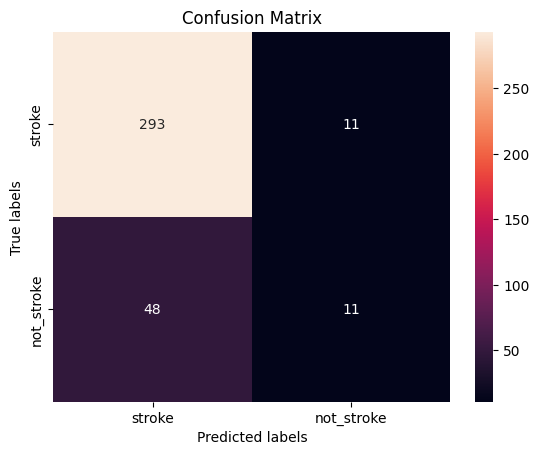

In [55]:
y_pred = lr.fit(x_train, y_train).predict(x_test)
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['stroke','not_stroke']); ax.yaxis.set_ticklabels(['stroke','not_stroke']);